                                                      CAR CRACH DATA MINING                                                  

                                                          < GOAL >                                                    

##### The goal of collecting this dataset:
 The dataset on car accidents is collected to enable predictive modeling of traffic incidents. The primary
  objective is to identify patterns and key factors contributing to car accidents, such as collision 
  type, reported location, injury types, and contributing elements. By using this data, predictive 
  models can be developed to classify and cluster the likelihood of future accidents, with the aim of 
  improving road safety, optimizing traffic management, and informing policy decisions.
We classify car collisions based on risk levels: High Risk, Moderate Risk, and Low Risk. This classification is determined by the time of day, the day of the week, and the type of injury.


Link/Resource of this dataset: https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset?resource=download - Car Accidents in USA more specific LA-monroe
Number of Rows: 53943
Number of Columns: 11

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.model_selection import train_test_split

# Load dataset
data1 = pd.read_csv("/workspaces/IT326/Dataset/monroe county car crach 2003-2015.csv", encoding="windows-1252")  
df = pd.DataFrame(data1) 

# Display basic information about the dataset
print(df.info()) 
print(df.describe())

# Class label to classify collision risk
def classify_collision(row):
    if (row['Hour'] >= 1600 and  row['Hour'] <= 2000 ) or (row['Hour'] >= 700 and  row['Hour'] <= 900 ) or row['Weekend?'] == 'Weekend' and row['Injury Type'] == 'Incapacitating':
        return 'High Risk'
    elif row['Injury Type'] == 'No injury/unknown':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

data1['Risk Level'] = data1.apply(classify_collision, axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB
None
               Year         Month           Day          Hour      Latitude  \
count  53943.000000  53943.000000  53943.000000  53718.000000  53913.000000   
mean    2008.968059      6.662162      4.1

                                              < Visualizations >                                                 

##### Scatter Plot of Day vs Hour by Collision Type
This plot shows how collision types vary with time and day. We can see if certain collision types are more frequent during specific hours or days.

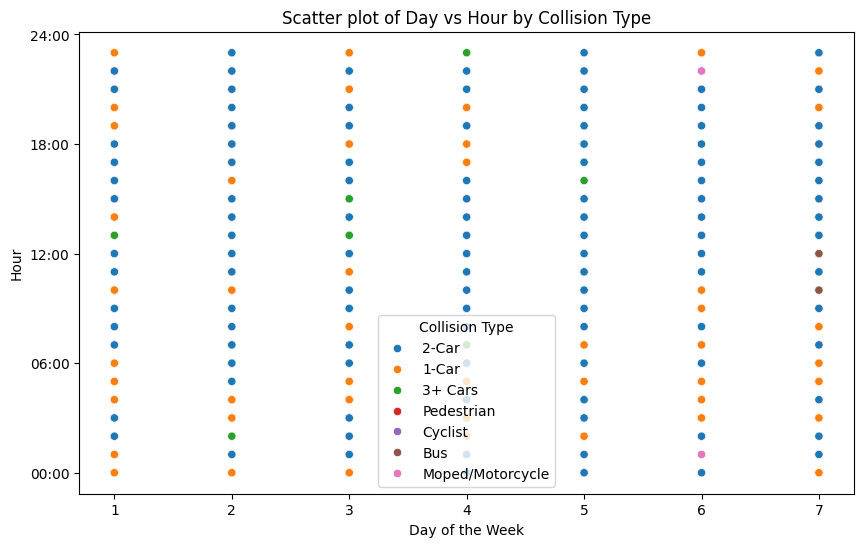

In [3]:
# Visualizations // graphs and tables show variables distribution

    # Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day', y='Hour', data=data1, hue='Collision Type')
plt.title('Scatter plot of Day vs Hour by Collision Type')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.yticks([0, 600, 1200, 1800, 2400], ['00:00', '06:00', '12:00', '18:00', '24:00']) #newly added
plt.show()

##### Histogram of Hour Distribution

The following histogram shows the distribution of incidents across different hours of the day. By plotting this distribution, we can identify the times during the day when incidents are most frequent.


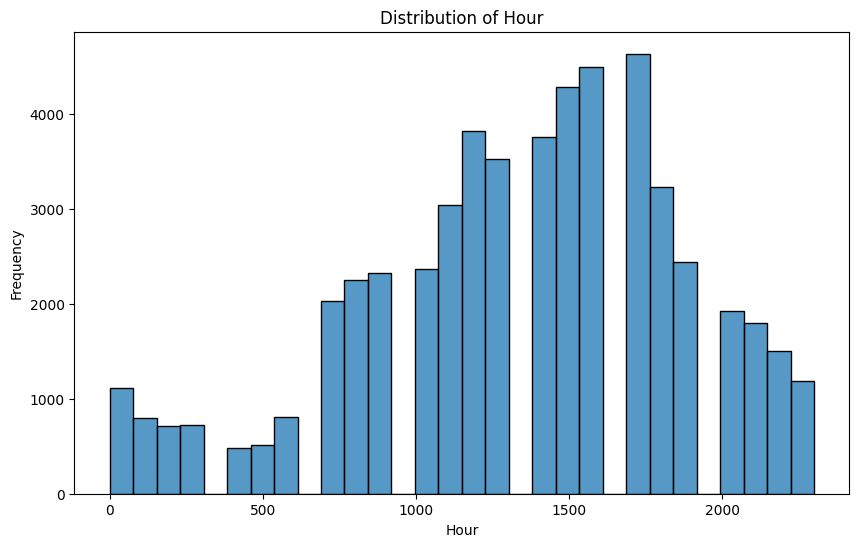

In [4]:
    # Histogram 
plt.figure(figsize=(10, 6))
sns.histplot(data1['Hour'], bins=30)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show() 

##### Bar Plot of Collision Type vs Injury Type

This bar plot illustrates the frequency of each collision type and how it corresponds with different injury types. By observing the distribution of collisions and associated injuries, we can analyze which types of collisions are most associated with certain levels of injury severity.

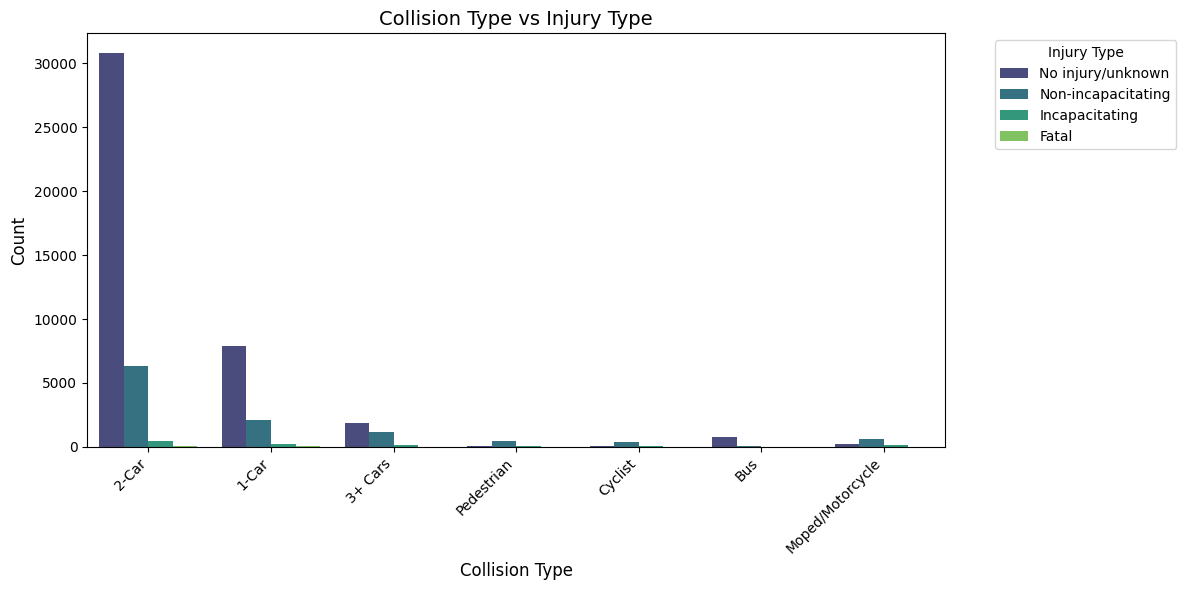

In [5]:
# Bar plot showing the frequency of each Collision Type and Injury Type
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=data1, x='Collision Type', hue='Injury Type', palette='viridis')

# Add title and labels
plt.title('Collision Type vs Injury Type', fontsize=14)
plt.xlabel('Collision Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

##### Pie Chart of Day Frequency (Sample Data)

This pie chart shows the distribution of incidents by day of the week, based on a random sample of 100 entries from the dataset. By visualizing the day frequencies, we can understand on which days incidents are more prevalent within this sample.

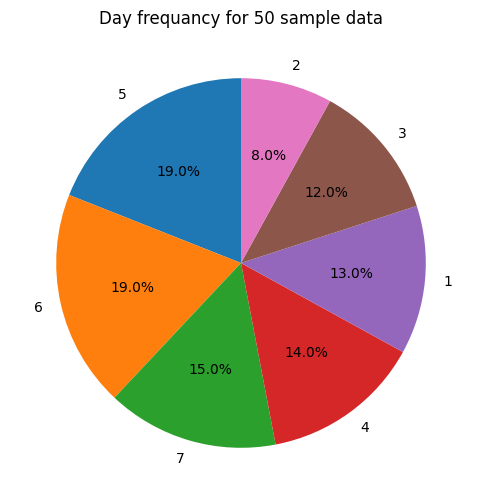

In [6]:

    # pie chart for 'Hour' column from the sample
# sample from  dataset
sampled_data = data1.sample(n=100, random_state=1) 
Day_frequancy = sampled_data['Day'].value_counts(normalize=True)*100
Day_frequancy.plot.pie(autopct='%1.1f%%', figsize=(10,6),startangle=90)
plt.ylabel('')
plt.title('Day frequancy for 50 sample data')
plt.show()

#### Box Plot of Hour Distribution by Risk Level

The box plot below displays the distribution of incident hours across different risk levels (High, Moderate, and Low Risk). By examining the spread and median of each risk level, we can gain insights into the time periods associated with different risk levels.

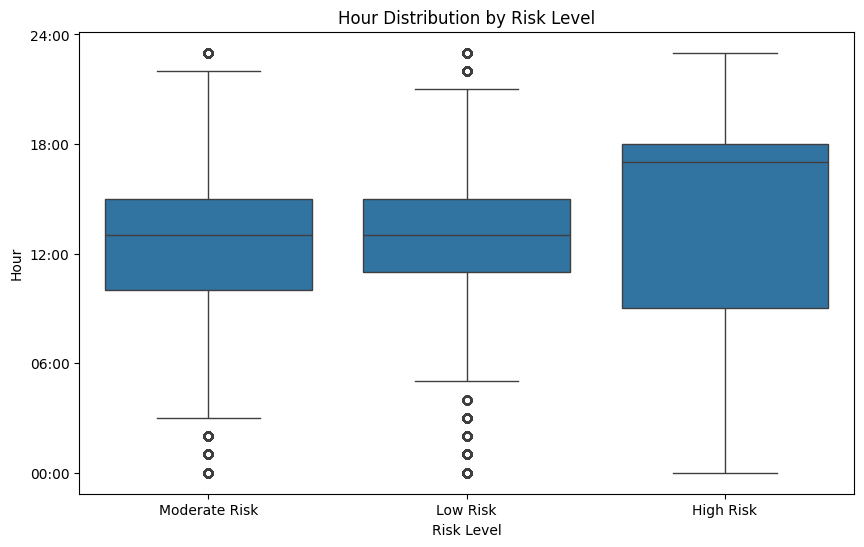

In [7]:

    # Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Level', y='Hour', data=data1)
plt.title('Hour Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Hour')
plt.yticks([0, 600, 1200, 1800, 2400], ['00:00', '06:00', '12:00', '18:00', '24:00']) #newly added
plt.show()


#### Count Plot of Risk Level Distribution

This count plot shows the distribution of risk levels (High, Moderate, and Low Risk) in the dataset. This visualization helps us assess the balance of data across different risk categories, which is important for understanding class distribution.
The bar chart illustrates the distribution of the 'Risk Level' categories in the dataset, showing the frequency of each class (Moderate Risk, Low Risk, and High Risk). A balanced class distribution is ideal for classification tasks, as it helps models learn patterns across all categories effectively. However, in this dataset:

Moderate Risk and High Risk have significantly higher frequencies compared to Low Risk.
Low Risk is underrepresented, which may lead to challenges in accurately predicting this category.

/tmp/ipykernel_2609/1340840652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data1, x='Risk Level', palette='viridis')


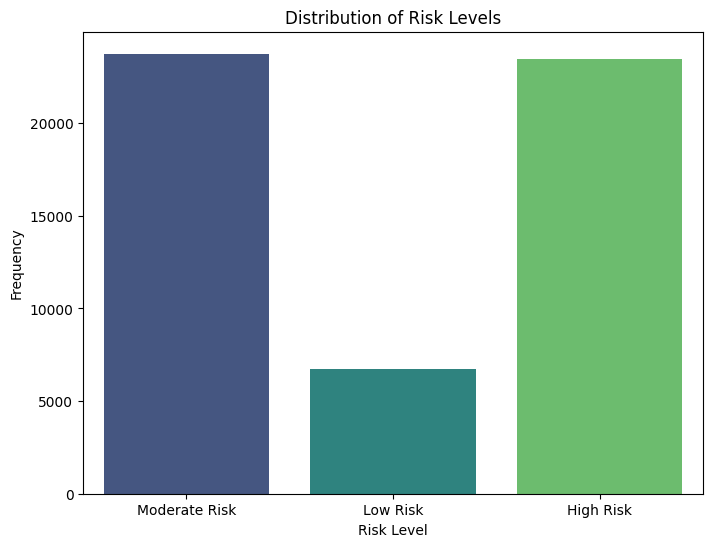

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Risk Level', palette='viridis')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.show()

                                              < Missing Values >                                                 


Column-Wise Missing Values: The missing_values variable shows the count of missing values for each column in data1. This helps identify specific columns that may require data cleaning or imputation.

Total Missing Values: By summing the values in missing_values, the total number of missing entries in the entire dataset is obtained. This provides an overview of the extent of missing data and the potential impact on data analysis.

In [4]:
# Missing Values
missing_values = data1.isna().sum()
print("\nMissing values in each column:\n", missing_values)
print("\nTotal number of missing values:\n", missing_values.sum())


Missing values in each column:
 Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
Risk Level              0
dtype: int64

Total number of missing values:
 1515


                                              < Statistical summaries >                                               

#### Statistical Summary
Below are the summary statistics for each numerical column, which help us understand the central tendency and distribution of the data.
As we can see the mean for Year column is 2008 which indicates that most crashes fall under this period. The mean Hour of 1347 (1:47 PM) implies that incidents are more frequent in the afternoon.
The meadian for the Hour column is 1400 (2:00 PM) which aligns closely to the mean and confirms most accidents happen in the afternoon. The large variance in Hour (282,656) shows that incidents occur throughout the day. On the contrary the year variance (14.36) is relatively low, indicating that incidents occur within a tight range of years. The mode shows us that the most frequent month that accidents occured at is October and the day is the 6th. Lastly, The standard deviation for the year (3.79) indicates incidents occur within a few years around 2008.

In [5]:
# Statistical summaries (Central tendency measurements such as mean and variance)
numeric_data = data1.select_dtypes(include=['number'])

print("\nMean:\n", numeric_data.mean())
print("\nMedian:\n", numeric_data.median())
print("\nVariance:\n", numeric_data.var())
print("\nstander deviation:\n", numeric_data.std())
print("\nmode:\n", numeric_data.mode())


Mean:
 Year         2008.968059
Month           6.662162
Day             4.196912
Hour         1347.265349
Latitude       35.582109
Longitude     -78.619224
dtype: float64

Median:
 Year         2009.000000
Month           7.000000
Day             4.000000
Hour         1400.000000
Latitude       39.164430
Longitude     -86.530992
dtype: float64

Variance:
 Year             14.362277
Month            12.352624
Day               3.645961
Hour         282656.017271
Latitude        127.461469
Longitude       622.881135
dtype: float64

stander deviation:
 Year           3.789760
Month          3.514630
Day            1.909440
Hour         531.654039
Latitude      11.289883
Longitude     24.957587
dtype: float64

mode:
    Year  Month  Day    Hour  Latitude  Longitude
0  2003     10    6  1700.0       0.0        0.0


                                              < variable transformation >                                               

#### Imputation of missing values
in this section we fill out previously shown missing values (numerical and categorical), and we check for missing values again to confirm none is to be resolved.
We used most frequent values to fill out categorical, And mean for numerical.

In [6]:
# 1. Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data1[['Weekend?', 'Collision Type', 'Primary Factor', 'Reported_Location']] = imputer_cat.fit_transform(data1[['Weekend?', 'Collision Type', 'Primary Factor', 'Reported_Location']])

   # 2. Impute missing values for numeric columns with mean
imputer_num = SimpleImputer(strategy='mean')
data1[['Hour', 'Latitude', 'Longitude']] = imputer_num.fit_transform(data1[['Hour', 'Latitude', 'Longitude']])

      # -Check missing values again
missing_values = data1.isna().sum()
print("\nMissing values after imputation:\n", missing_values)


Missing values after imputation:
 Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
Risk Level           0
dtype: int64


#### Encoding Categorical Columns
Convert categorical columns to numerical format using label encoding, to make feature selection faster and more efficient.

In [7]:
 # Encoding 
le = LabelEncoder()
data1['Weekend?']= le.fit_transform(data1['Weekend?']) 
data1['Collision Type'] = le.fit_transform(data1['Collision Type'])
data1['Injury Type'] = le.fit_transform(data1['Injury Type'])
data1['Primary Factor'] = le.fit_transform(data1['Primary Factor'])
data1['Reported_Location'] = le.fit_transform(data1['Reported_Location'])

#### Discretization of the 'Hour' Column
We divide the Hour column into bins for different times of day (Night, Morning, Afternoon, Evening), Then we encode it.

In [8]:
 # Discretization 
data1['Hour_Bin'] = pd.cut(data1['Hour'], bins=[0, 600, 1200, 1800, 2400], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False) 
  # Encode 'Hour_Bin'
data1['Hour_Bin'] = le.fit_transform(data1['Hour_Bin'])

#### Normalization of Longtitude and Latitude
Normalize Latitude and Longitude columns to scale them between 0 and 1.

In [9]:
 # Normalization of Latitude and Longitude
scaler = MinMaxScaler()
data1[['Hour','Latitude', 'Longitude']] = scaler.fit_transform(data1[['Hour','Latitude', 'Longitude']])


#### Detecting Outliers in the 'Hour' Column
Identify outliers in the Hour column by calculating the mean and standard deviation, using a threshold of 2 standard deviations.


Outliers:
        Year  Month  Day  Weekend?      Hour  Collision Type  Injury Type  \
0      2015      1    5         0  0.000000               1            2   
43     2015      1    4         0  0.000000               0            2   
57     2015      1    7         1  0.000000               1            2   
73     2015      1    4         0  0.000000               1            1   
82     2015      1    1         1  0.043478               1            2   
...     ...    ...  ...       ...       ...             ...          ...   
53683  2003      5    7         1  0.086957               1            2   
53694  2003      6    7         1  0.043478               1            3   
53701  2003      7    6         0  0.000000               1            2   
53752  2003      2    7         1  0.086957               1            2   
53846  2003     11    5         0  0.043478               1            2   

       Primary Factor  Reported_Location  Latitude  Longitude     Risk Leve

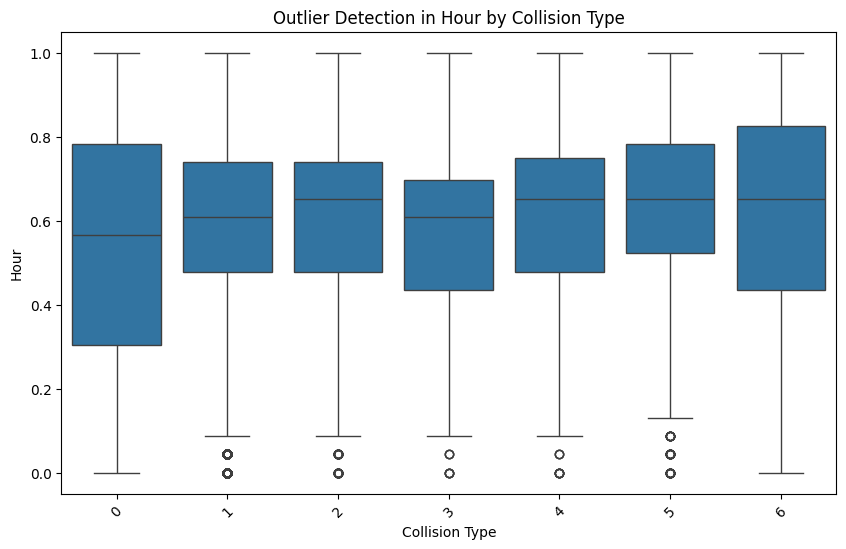

In [10]:
   # Detect Outlier in 'Hour' column
threshold = 2

        # -Calculate mean and standard deviation of the 'Hour' column
mean_hour = data1['Hour'].mean()
std_hour = data1['Hour'].std()

        # -Detect outliers
outliers = data1[data1['Hour'].apply(lambda x: abs(x - mean_hour) > threshold * std_hour)]
print("\nOutliers:\n", outliers)

        # -Visualization for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='Collision Type', y='Hour')
plt.title('Outlier Detection in Hour by Collision Type')
plt.xticks(rotation=45)
plt.show()


                                                    < Feature Selection >                                            


#### Correlation Coefficient Calculation
Calculate the correlation coefficient between the Hour and Latitude columns.

In [11]:
   # Correlation coefficient 
data_column = data1['Hour']  
data_column2 = data1['Latitude']  

correlation_coefficient = np.corrcoef(data_column, data_column2)[0, 1]
print(f"Correlation coefficient between 'Hour' and 'Latitude': {correlation_coefficient}")

Correlation coefficient between 'Hour' and 'Latitude': 0.0069404136797305395


#### Chi-Square Test for Independence
Perform a chi-square test to examine the relationship between Collision Type and Injury Type.

In [12]:
from scipy.stats import chi2_contingency

   # chi-square
     # -Create a contingency table
contingency_table = pd.crosstab(df['Collision Type'], df['Injury Type'])
print("Contingency Table:")
print(contingency_table)

      # -Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Contingency Table:
Injury Type       Fatal  Incapacitating  No injury/unknown  Non-incapacitating
Collision Type                                                                
1-Car                49             205               7854                2137
2-Car                31             451              30807                6317
3+ Cars               5             116               1855                1176
Bus                   1               9                758                  82
Cyclist               0              50                 61                 357
Moped/Motorcycle     21             154                213                 619
Pedestrian            8             104                 49                 448

Chi-Square Statistic: 6558.98764149363
Degrees of Freedom: 18
Expected Frequencies:
[[2.18435397e+01 2.06848824e+02 7.90109322e+03 2.11521442e+03]
 [8.01803956e+01 7.59273486e+02 2.90022949e+04 7.76425118e+03]
 [6.72043310e+00 6.36395795e+01 2.43086831e+03 6.50771678e+

#### Remove Highly Correlated Attributes
Identify and remove attributes that are highly correlated (correlation threshold ≥ 0.75).

In [14]:
# Calculate the correlation matrix
correlation_matrix = data1.corr(numeric_only=True)

# Set the threshold for correlation
correlation_threshold = 0.75

# Find highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
numeric_attributes = list(data1.select_dtypes(include='number'))
attributes_to_remove = set()

# Iterate through the correlated pairs
for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        # Check if both attributes are not in the removal set
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        # Add one of them to the removal set (choosing j here)
        attributes_to_remove.add(attribute_j)

# Remove the highly correlated attributes
data1_filtered = data1.drop(columns=attributes_to_remove)

print("\nOriginal DataFrame:")
print(data1)

print("\nDataFrame after removing highly correlated attributes:")
print(data1_filtered)



Original DataFrame:
       Year  Month  Day  Weekend?      Hour  Collision Type  Injury Type  \
0      2015      1    5         0  0.000000               1            2   
1      2015      1    6         0  0.652174               1            2   
2      2015      1    6         1  1.000000               1            3   
3      2015      1    7         1  0.391304               1            3   
4      2015      1    7         1  0.478261               1            2   
...     ...    ...  ...       ...       ...             ...          ...   
53938  2003     10    6         0  0.739130               1            2   
53939  2003     11    3         0  0.347826               0            2   
53940  2003     12    5         0  0.521739               1            2   
53941  2003     12    1         1  0.304348               1            2   
53942  2003     12    7         1  0.739130               1            3   

       Primary Factor  Reported_Location  Latitude  Longitude     

#### Separate Target and Features
In this step, we separate the target variable (`'Risk Level'`) from the features in the dataset. `X` contains all the features, and `y` contains the target variable.

In [15]:

# Separate the target variable ('Risk Level') from the features
X = data1.drop(['Risk Level'], axis=1)  # Features
y = data1['Risk Level']  # Target

#### Correlation-Based Feature Selection
We compute the correlation matrix to identify highly correlated features. If two features have a correlation above a threshold (0.8), we drop one of them to reduce multicollinearity and improve model performance.

In [16]:
# 1. Correlation-based feature selection
corr_matrix = X.corr()  # Compute correlation matrix
corr_threshold = 0.8  # Threshold for high correlation
high_corr = corr_matrix[(corr_matrix.abs() > corr_threshold) & (corr_matrix != 1.0)]  # Find highly correlated pairs

# Drop one feature from each correlated pair
to_drop = [col for col in high_corr.columns if any(high_corr[col].abs() > corr_threshold)]
X_reduced = X.drop(columns=to_drop)  # Reduced feature set

#### SelectKBest Feature Selection (Chi-Squared Test)
We use SelectKBest to select the top 5 features based on the chi-squared test. This method ranks features according to their relevance for classification, helping us identify the most important features.

In [17]:
# 2. SelectKBest: Select top 10 features using chi-squared test
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_reduced, y)
selected_features = selector.get_support(indices=True)
print("\nSelected Features using SelectKBest:\n", X_reduced.columns[selected_features])


Selected Features using SelectKBest:
 Index(['Weekend?', 'Collision Type', 'Injury Type', 'Primary Factor',
       'Reported_Location'],
      dtype='object')


#### Variance Threshold Feature Selection
Here, we use the VarianceThreshold method to select features that have variance greater than a specified threshold (0.2). This helps remove features with low variance, which are likely less informative.

In [18]:
# 3. Variance Threshold: Select features with variance above a threshold (0.01)
threshold = 0.2
selector = VarianceThreshold(threshold=threshold)
X_new = selector.fit_transform(X)
selected_features = selector.get_support(indices=True)
print("\nSelected Features based on Variance Threshold:\n", X.columns[selected_features])


Selected Features based on Variance Threshold:
 Index(['Year', 'Month', 'Day', 'Collision Type', 'Injury Type',
       'Primary Factor', 'Reported_Location', 'Hour_Bin'],
      dtype='object')


#### Recursive Feature Elimination (RFE) with Logistic Regression
RFE is used to recursively remove features and build a model on the remaining features. It selects the top features based on their ranking after each elimination step. In this case, we use Logistic Regression as the estimator.

In [19]:
# 4. Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(max_iter=500, solver='saga')  # Initialize logistic regression model
num_features_to_select = 5  # Number of features to select
selector = RFE(estimator=model, n_features_to_select=num_features_to_select)
selector = selector.fit(X, y)
selected_features = selector.get_support(indices=True)
print("\nSelected Features based on RFE:\n", X.columns[selected_features])
print("\nFeature Ranking:\n", selector.ranking_)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Selected Features based on RFE:
 Index(['Weekend?', 'Hour', 'Injury Type', 'Latitude', 'Longitude'], dtype='object')

Feature Ranking:
 [7 6 4 1 1 3 1 5 8 1 1 2]


#### Encode Target Variable
We encode the target variable (`'Risk Level'`) using a LabelEncoder to convert the categorical labels into numerical values, making it suitable for model training.

In [20]:
# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

#### L1 Regularization (Lasso) for Embedded Feature Selection
Lasso (L1 regularization) is applied to the model to shrink less important feature coefficients to zero, effectively performing feature selection. The features selected by Lasso are considered the most important.

In [21]:
# 5. L1 Regularization (Lasso) for embedded feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X, y_encoded)  # Fit Lasso model
selector = SelectFromModel(lasso, prefit=True)
selected_features = X.columns[selector.get_support()]
print("Selected Features based on L1 Regularization:", selected_features)

Selected Features based on L1 Regularization: Index(['Primary Factor'], dtype='object')


                                                        < Final Data >                                                

In [22]:
# Final data info
print(data1.info())
print(data1.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53943 non-null  int64  
 4   Hour               53943 non-null  float64
 5   Collision Type     53943 non-null  int64  
 6   Injury Type        53943 non-null  int64  
 7   Primary Factor     53943 non-null  int64  
 8   Reported_Location  53943 non-null  int64  
 9   Latitude           53943 non-null  float64
 10  Longitude          53943 non-null  float64
 11  Risk Level         53943 non-null  object 
 12  Hour_Bin           53943 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 5.4+ MB
None
               Year         Month           Day      Weekend?          Hour  \
count  53943.000000  5394

#### Saving the data


In [24]:
data1.to_csv("Processed_dataset.csv", index=False)

In [23]:


   # 3. Create a new Date column from Year, Month, and Day
#data1['Date'] = pd.to_datetime(data1[['Year', 'Month', 'Day']])

  # 4. Drop the original Year, Month, and Day columns coz you create Date column
#data1.drop(columns=['Year', 'Month', 'Day'], inplace=True)


